In [122]:
import cv2
import matplotlib.pyplot as plt

# Read the image.
img = cv2.imread('taj.jpg')
img = (img[:,:,0]+img[:,:,1]+img[:,:,2])//3

# Apply bilateral filter with d = 15, 
# sigmaColor = sigmaSpace = 75.
#bilateral = cv2.bilateralFilter(img, 15, 75, 75)
bilateral = cv2.bilateralFilter(img, 9, 40, 40)


# Save the output.
cv2.imwrite('taj_bilateral.jpg', bilateral)

True

In [123]:
import numpy as np

def process_pixel(img, i, j, k=9, b=25.0):
    r = k // 2
    padded = np.pad(img, r, mode='constant', constant_values=-100)
    pi, pj = i + r, j + r
    K1 = padded[pi-r:pi+r+1, pj-r:pj+r+1].astype(np.float64)
    mew = padded[pi-1:pi+1+1, pj-1:pj+1+1].astype(np.float64)
    #mew = (1/9)*(mew.sum())
    a = padded[pi, pj]
    #a = mew
    K2 = np.exp(-((K1 - a)**2) / (2.0 * (b**2)))
    mn = K2.min()
    mx = K2.max()
    K3 = (K2 - mn) / (mx - mn + 1e-12)
    K4 = (K3 >= 0.8).astype(np.float64)
    wsum = K4.sum()
    if wsum == 0:
        return float(a)
    patch = K1
    return float((K4 * patch).sum() / wsum)

def reconstruct_image(img, k=9, b=25.0):
    img_arr = img.astype(np.float64)
    H, W = img_arr.shape
    out = np.zeros_like(img_arr)
    for i in range(H):
        for j in range(W):
            out[i, j] = process_pixel(img_arr, i, j, k=k, b=b)
    return out


In [124]:
im2 = reconstruct_image(img,9,40)

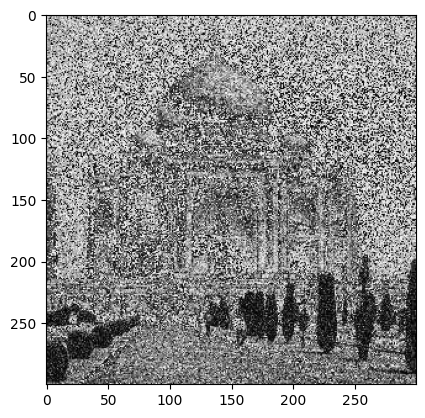

In [125]:
plt.imshow(img, cmap = "gray")

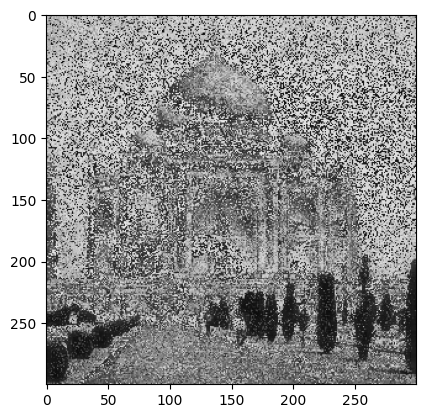

In [126]:
plt.imshow(im2,cmap = "gray")

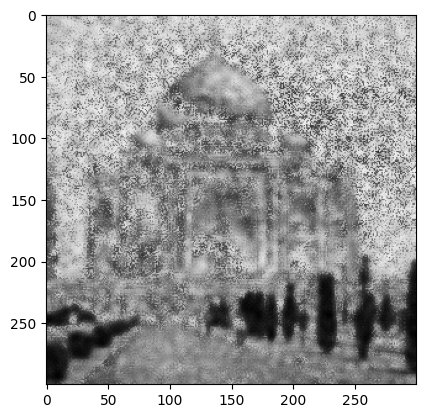

In [127]:
plt.imshow(bilateral,cmap = "gray")

In [128]:
im3 = reconstruct_image(im2,9,40)

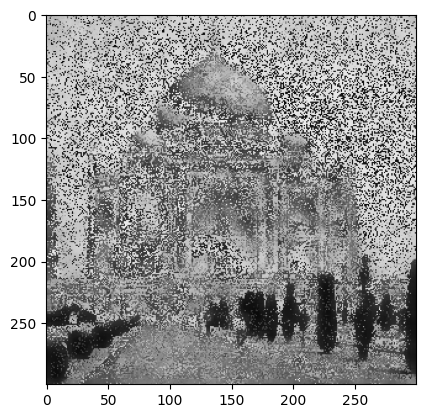

In [129]:
plt.imshow(im3,cmap = "gray")

In [130]:
im4 = reconstruct_image(im3,9,40)

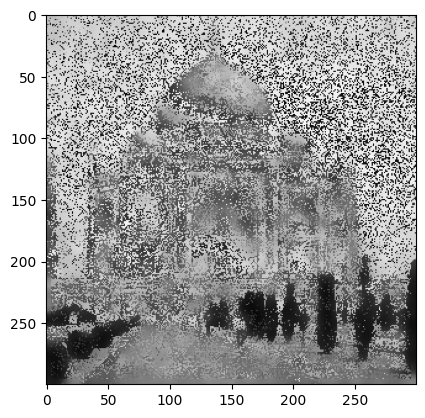

In [131]:
plt.imshow(im4,cmap = "gray")

In [132]:
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
def eval_pair(clean, recon):
    return psnr(clean, recon, data_range=clean.max()-clean.min()), \
           ssim(clean, recon, data_range=clean.max()-clean.min())


In [133]:
eval_pair(img, bilateral)

(np.float64(14.670590048853295), np.float64(0.5540872037480598))

In [134]:
eval_pair(img, im2)

(np.float64(23.230247564985596), np.float64(0.9536187065090533))

In [135]:
eval_pair(img, im3)

(np.float64(18.830674902891623), np.float64(0.8555735487447196))

In [136]:
eval_pair(img, im4)

(np.float64(17.300347302032485), np.float64(0.7789430845715071))